# Import libraries and define some common attributes and matrixes

In [1]:
import numpy as np
np.random.seed(233)            #global random seed
import random
random.seed(233)
import matplotlib.pyplot as plt

a = 20       #dimension of the map
b = 15       #dimension of the map

smallnumber = 0                     # the lower limit on the map
bignumber = 10                      # the upper limit on the map
verybignumber = a * b * bignumber + 99999                      # a fake infinite number

environmentmap = np.random.randint(smallnumber, bignumber, size = (a, b))            #generate a random map
#environmentmap = np.array([[0,2,4,9],[7,1,2,2],[9,2,9,1],[1,5,9,9]])     #we can also set a map by hand

environmentmap[0, 0] = 0           #set the start point to be 0.
environmentmap[a-1, b-1] = 0      #set the end point to be 0

# Visualise the map

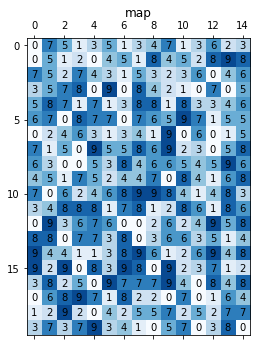

In [2]:
current_cmap = plt.cm.Blues
current_cmap.set_bad(color='red')
plt.matshow(environmentmap, cmap=plt.cm.Blues, vmin=0, vmax=10)
plt.title("map")
for i in range(a):
    for j in range(b):
      c = environmentmap[i,j]
      plt.text(j, i, str(c), va='center', ha='center')
plt.show()

# Random

the random route is: [[0, 0], [1, 0], [2, 0], [2, 1], [3, 1], [4, 1], [5, 1], [5, 2], [6, 2], [7, 2], [8, 2], [9, 2], [10, 2], [10, 3], [11, 3], [11, 4], [11, 5], [12, 5], [13, 5], [13, 6], [13, 7], [14, 7], [14, 8], [14, 9], [15, 9], [15, 10], [15, 11], [15, 12], [16, 12], [16, 13], [17, 13], [18, 13], [19, 13], [19, 14]]


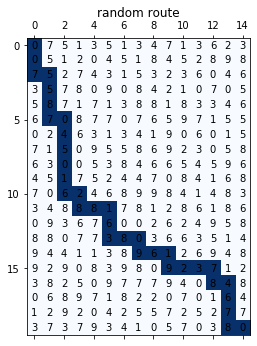

the length of random route is: 154


In [3]:
x = environmentmap.shape[0]
y = environmentmap.shape[1]

minborder = min(x,y)

tracklist_random = []
templocation = [0,0]
tracklist_random.append(templocation.copy())
while templocation[0] <= x-2 and templocation[1] <= y-2:          #when the bot does not reach the border
    dice = random.randint(0, 1)       #go x(x+1) if dice = 0, go y if dice = 1
    
    if dice == 0:
        templocation[0] += 1
        
    elif dice == 1:
        templocation[1] += 1

    tracklist_random.append(templocation.copy())

if tracklist_random[-1][0] == x-1:                    #if the robot touches the x border, it can only increase y.  #if 横坐标=19
    yremaining = y-1 - tracklist_random[-1][1]
    for i in range(yremaining):
        templocation[1] += 1
        tracklist_random.append(templocation.copy())
        
elif tracklist_random[-1][1] == y-1:                    #if the robot touches the y border, it can only increase x.
    xremaining = x-1 - tracklist_random[-1][0]
    for i in range(xremaining):
        templocation[0] += 1
        tracklist_random.append(templocation.copy())
    
print('the random route is:', tracklist_random)

#-------------------------------------------------------------------------------------------
#print and plot results
solutionmap = environmentmap.copy()

randomdistance = 0
for [i, j] in tracklist_random:         
    solutionmap[i, j] = verybignumber
    randomdistance += environmentmap[i, j]

plt.matshow(solutionmap, cmap=plt.cm.Blues, vmin=0, vmax=verybignumber)
plt.title("random route")
for i in range(a):
    for j in range(b):
      c = environmentmap[i,j]
      plt.text(j, i, str(c), va='center', ha='center')
plt.show()

print('the length of random route is:', randomdistance)

## My algorithm


My algorithm route: [[0, 0], [1, 0], [1, 1], [1, 2], [2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [7, 2], [8, 2], [8, 3], [8, 4], [8, 5], [9, 5], [9, 6], [9, 7], [9, 8], [9, 9], [10, 9], [11, 9], [12, 9], [12, 10], [12, 11], [13, 11], [13, 12], [13, 13], [14, 13], [15, 13], [15, 14], [16, 14], [17, 14], [18, 14], [19, 14]]


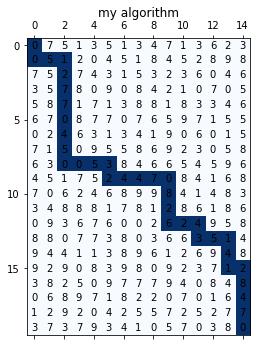

the length of my algorithm is: 113


In [4]:
x = environmentmap.shape[0]
y = environmentmap.shape[1]

minborder = min(x,y)

tracklist_myalgorithm = []
templocation = [0,0]
tracklist_myalgorithm.append(templocation.copy())
while templocation[0] <= x-2 and templocation[1] <= y-2:          #when the bot does not reach the border

    if environmentmap[templocation[0]+1, templocation[1]] <= environmentmap[templocation[0], templocation[1]+1]:
        templocation[0] += 1
        
    elif environmentmap[templocation[0]+1, templocation[1]] >= environmentmap[templocation[0], templocation[1]+1]:
        templocation[1] += 1

    tracklist_myalgorithm.append(templocation.copy())

if tracklist_myalgorithm[-1][0] == x-1:                    #if the robot touches the x border, it can only increase y.
    yremaining = y-1 - tracklist[-1][1]
    for i in range(yremaining):
        templocation[1] += 1
        tracklist_myalgorithm.append(templocation.copy())
        
elif tracklist_myalgorithm[-1][1] == y-1:                    #if the robot touches the y border, it can only increase x.
    xremaining = x-1 - tracklist_myalgorithm[-1][0]
    for i in range(xremaining):
        templocation[0] += 1
        tracklist_myalgorithm.append(templocation.copy())
        
print('My algorithm route:', tracklist_myalgorithm)

#------------------------------------------------------------------------------------------------------
#print and plot results
solutionmap = environmentmap.copy()

myalgorithmdistance = 0
for [i, j] in tracklist_myalgorithm:                                    #If we want to see different results, we change the tracklist here
    solutionmap[i, j] = verybignumber
    myalgorithmdistance += environmentmap[i, j]
    
plt.matshow(solutionmap, cmap=plt.cm.Blues, vmin=0, vmax=verybignumber)
plt.title("my algorithm")
for i in range(a):
    for j in range(b):
      c = environmentmap[i,j]
      plt.text(j, i, str(c), va='center', ha='center')
plt.show()

print('the length of my algorithm is:', myalgorithmdistance)

# Dijkstra

Dijkstra route: [[0, 0], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [2, 5], [2, 6], [3, 6], [4, 6], [5, 6], [6, 6], [6, 5], [7, 5], [8, 5], [9, 5], [10, 5], [11, 5], [12, 5], [12, 6], [12, 7], [13, 7], [13, 8], [13, 9], [14, 9], [14, 10], [15, 10], [15, 11], [16, 11], [17, 11], [17, 12], [18, 12], [19, 12], [19, 13], [19, 14]]


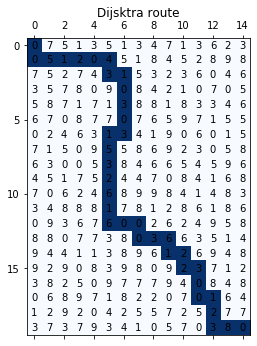

the length of this dijkstra algorithm is: 77


In [5]:
# The first thing I do is to set some axillary lists

#first axillary list, labelled or not
is_labelled = np.zeros(shape = (a, b), dtype = 'bool')

#second axillary list, distance from the start point
distance = np.empty(shape = (a, b), dtype = 'int')
for i in range(a):
    for j in range(b):
        distance[i, j] = verybignumber                        #set the initial distance number in this set to be a very big number
distance[0, 0] = 0

#third (and fourth) list, The previsous location. We could use one list to do this, but to make it easy, I use to
lastcelly = np.zeros(shape = (a, b), dtype = 'int')
lastcellx = np.zeros(shape = (a, b), dtype = 'int')

#-----------------------------------------------------------------------------------------------

#set some helper functions
#check if all cells are labelled. Keep running this program if not. Until all cells labelled.
def whether_all_cells_labelled(labelarray):
    Labell_or_not = True
    for i in range(a):
        for j in range(b):
            if is_labelled[i, j] == False:
                Labell_or_not = False
    return Labell_or_not

#find the smallest cell in all unlabelled cells
#before that we should first set the labelled ones to be infinite in another array
def find_smallest_in_array(array1):
#first replace all labelled cells with infinite(very big number)
    array2 = array1.copy()
    for i in range(a):
        for j in range(b):
            if is_labelled[i, j] == True:
                array2[i, j] = verybignumber

#find the smallest number in the distance array and its location. If more than one, then just the first one.
    smallestnumber = array2[0, 0]
    smallestx = 0
    smallesty = 0
    for i in range (a):
        for j in range (b):
            if array2[i,j] < smallestnumber:
                smallestnumber = array2[i,j]
                smallestx = i
                smallesty = j

    return smallestx, smallesty

#------------------------------------------------------------------------------------------------

#start dijkstra
#while not all cells labelled, do this until all cells labelled.
while whether_all_cells_labelled(is_labelled) == False:

    #search the nearby of the smallest cell. From the current smallest go to them. 
    #if distance smaller than current, update it.
    
    x, y = find_smallest_in_array(distance)                                    #find the currently smallest number in all unlabelled

    for [i, j] in ([x-1, y], [x+1, y], [x, y-1], [x, y+1]):                     #for the near cells
        if 0 <= i and i <= a-1 and 0<=j and j<=b-1:                             #for the near cells that are within the map border
            newdistance = distance[x, y] + environmentmap[i, j]                 #calculate the new distance
            if newdistance < distance[i, j]:                                     #if the distance of new route is better
                distance[i, j] = newdistance                                    #updata distance

                lastcellx[i, j] = x                                             #updata the previous cell
                lastcelly[i, j] = y

        is_labelled[x, y] = True                                              #mark it as labelled

#backtrack from the end point to get the tracklist
tracklist = []
i = a-1
j = b-1
while i !=0 or j != 0:
    point = [i, j]
    tracklist.insert(0, [i, j])
    i = lastcellx[point[0], point[1]]
    j = lastcelly[point[0], point[1]]
tracklist.insert(0, [0, 0])

tracklist_dijkstra = tracklist.copy()
print('Dijkstra route:', tracklist)

#-------------------------------------------------------------------------------------------------
#print and plot results

solutionmap = environmentmap.copy()

dijkstradistance = 0
for [i, j] in tracklist_dijkstra:            
    solutionmap[i, j] = verybignumber                       #create a 'solution map' to show color difference
    dijkstradistance += environmentmap[i, j]

plt.matshow(solutionmap, cmap=plt.cm.Blues, vmin=0, vmax=verybignumber)
plt.title("Dijsktra route")
for i in range(a):
    for j in range(b):
      c = environmentmap[i,j]
      plt.text(j, i, str(c), va='center', ha='center')
plt.show()

print('the length of this dijkstra algorithm is:', dijkstradistance)

# Compare and visualise results